In [24]:
%cd /workspace
from nuscenes.nuscenes import NuScenes, NuScenesExplorer
import fiftyone as fo
import matplotlib.pyplot as plt
import numpy as np
import helpers
import open3d as o3d

#reload all dependencies
%load_ext autoreload
%autoreload 2

/usr/local/lib/python3.10/dist-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


/workspace
Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
# prepare the dataset
DATASET_ROOT = "/datastore/nuScenes/"
dataset = fo.load_dataset("nuscenes")
nusc = NuScenes(version='v1.0-trainval', dataroot=DATASET_ROOT, verbose=False)
explorer = NuScenesExplorer(nusc)

In [5]:
lidar_sample = dataset.select_group_slices(["LIDAR_TOP"]).first()
camera_sample = dataset.select_group_slices(["CAM_FRONT"]).first()

lidar_token = lidar_sample.sample_token
camera_token = camera_sample.sample_token

In [87]:
points, coloring, image = explorer.map_pointcloud_to_image(lidar_token, camera_token)

In [126]:
points_projected, coloring, image, visible_indices = helpers.map_pointcloud_to_image_with_indices(nusc, lidar_token, camera_token)

## Visaulize points projected into the image

<class 'PIL.JpegImagePlugin.JpegImageFile'>


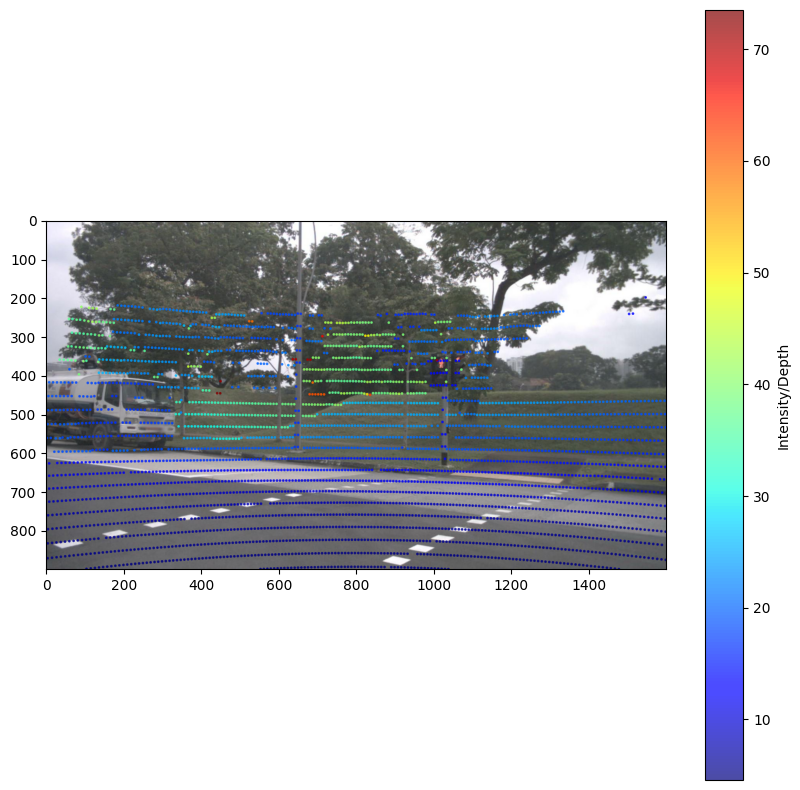

In [136]:
helpers.visualize_pointcloud_on_image(image, points_projected, coloring)

## Visualize the masks projected into the image

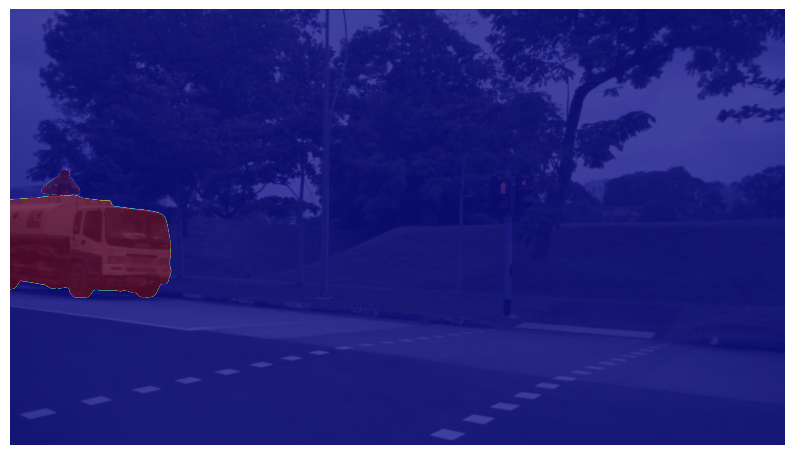

In [139]:
helpers.visualize_full_mask_on_image(image, camera_sample.pseudo_masks)

## Filter lidar points by the mask

In [146]:
pcd = o3d.io.read_point_cloud(lidar_sample.filepath)
lidar_data = np.asarray(pcd.points).T
image_ = np.array(image)
image_height, image_width = image_.shape[:2]
point_classes = -1 * np.ones(lidar_data.shape[1], dtype=int)
visible_labels = helpers.assign_labels_from_masks(points_projected, camera_sample, image_width, image_height)

In [152]:
point_classes[visible_indices] = visible_labels